In [1]:
import requests
link = 'https://de.wikipedia.org/wiki/Liste_der_Stadtteile_von_Düsseldorf'
r = requests.get(link, auth=('user', 'pass'))
website = r.text

import pandas as pd
tables = pd.read_html(website, encoding="UTF-8", decimal = ',', thousands = '.')
DUS = tables[0]
DUS.head()

,Stadtteil,"Stadtteilnummer, Stadtbezirk",Fläche,Einwohner,Bevölkerungsdichte,Eingemeindet,K,Karte
0,Altstadt[1],"011, 1","00,48 km²",01906,3971,NaN,Lage,NaN
1,Angermund[2],"055, 5","13,3 km²",06061,455,1975[3],Lage,NaN
2,Benrath[4],"095, 9","05,9 km²",15772,2673,1929[5],Lage,NaN
3,Bilk[6],"036, 3","05,56 km²",37275,6704,1384[7],Lage,NaN
4,Carlstadt[8],"012, 1","00,46 km²",02210,4804,1288[9],Lage,NaN


#### Remove the cititaion '[ ]' in the column 'Stadtteil' and then rename the column 'Stadtteil' as 'CityPart'

In [2]:
DUS['Stadtteil'] = DUS.Stadtteil.str.replace('(\[\d\d\])', '')
DUS['Stadtteil'] = DUS.Stadtteil.str.replace('(\[\d\])', '')
DUS.drop(['Stadtteilnummer, Stadtbezirk', 'Eingemeindet', 'K', 'Karte'], axis = 1, inplace=True)
DUS.head()

,Stadtteil,Fläche,Einwohner,Bevölkerungsdichte
0,Altstadt,"00,48 km²",01906,3971
1,Angermund,"13,3 km²",06061,455
2,Benrath,"05,9 km²",15772,2673
3,Bilk,"05,56 km²",37275,6704
4,Carlstadt,"00,46 km²",02210,4804


In [3]:
DUS = DUS.rename(columns = {'Stadtteil': 'CityPart', 'Fläche': 'Area',
                            'Einwohner': 'Population', 'Bevölkerungsdichte': 'PopulationDensity'})
DUS.head()

,CityPart,Area,Population,PopulationDensity
0,Altstadt,"00,48 km²",01906,3971
1,Angermund,"13,3 km²",06061,455
2,Benrath,"05,9 km²",15772,2673
3,Bilk,"05,56 km²",37275,6704
4,Carlstadt,"00,46 km²",02210,4804


In [4]:
DUS['CityPart'] = DUS.CityPart.str.replace('(\,)', '.')
DUS.replace(to_replace = DUS.iloc[23], value = 'Hubbelrath', inplace=True)

#### Sort the citypart by its area 

In [5]:
DUS.sort_values(['Area']).head(10)

,CityPart,Area,Population,PopulationDensity
4,Carlstadt,"00,46 km²",02210,4804
0,Altstadt,"00,48 km²",01906,3971
27,Knittkuhl,"00,85 km²",01947,2291
15,Grafenberg,"00,94 km²",05429,5775
11,Friedrichstadt,"01,04 km²",17839,17152
10,Flingern Süd,"01,5 km²",09593,6395
43,Unterbilk,"01,63 km²",17853,10952
40,Stadtmitte,"01,72 km²",13041,7581
39,Reisholz,"01,78 km²",03550,1994
20,Hellerhof,"01,95 km²",06172,3165


#### Extract the column 'CityPart' as a new dataframe DUS_CityPart

In [6]:
DUS_CityPart = pd.DataFrame(DUS['CityPart'])
DUS_CityPart.replace(to_replace = DUS_CityPart.iloc[23], value = 'Hubbelrath', inplace=True)
DUS_CityPart.head(10)

,CityPart
0,Altstadt
1,Angermund
2,Benrath
3,Bilk
4,Carlstadt
5,Derendorf
6,Düsseltal
7,Eller
8,Flehe
9,Flingern Nord


In [7]:
import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files

!pip3 install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!pip3 install folium 
import folium # map rendering library

print('Libraries imported.')

You should consider upgrading via the '/usr/local/opt/python/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python/bin/python3.6 -m pip install --upgrade pip' command.
Libraries imported.


#### Get the latitude and longitude data of each city part from Nominatim and then build up a new dataframe (DUS_CityPart_Geo) which contains the name of city part and its latitude and longitude. 

In [8]:
latitude = []
longitude = []
for area in DUS_CityPart['CityPart']:
    address = area + ', Duesseldorf, DE'
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude.append(float(location.latitude))
    longitude.append(float(location.longitude))
DUS_CityPart_Geo = DUS_CityPart.assign(latitude = latitude, longitude = longitude)
DUS_CityPart_Geo.head(10)

,CityPart,latitude,longitude
0,Altstadt,51.225912,6.773567
1,Angermund,51.328995,6.781416
2,Benrath,51.163356,6.875192
3,Bilk,51.202758,6.785101
4,Carlstadt,51.222142,6.773394
5,Derendorf,51.244549,6.792249
6,Düsseltal,51.237841,6.812116
7,Eller,51.201253,6.837591
8,Flehe,51.192204,6.771713
9,Flingern Nord,51.231381,6.813238


#### Get the latitude and longitude of Dusseldorf city

In [9]:
address_dus = 'Duesseldorf, DE'

geolocator = Nominatim(user_agent="ny_explorer")
location_dus = geolocator.geocode(address_dus)
latitude_dus = location_dus.latitude
longitude_dus = location_dus.longitude
print('The geograpical coordinate of Dusseldorf are {}, {}.'.format(latitude_dus, longitude_dus))

The geograpical coordinate of Dusseldorf are 51.2254018, 6.7763137.


#### Build a new dataframe City_Center, which contains the information of the three city center area: 'Altstadt', 'Carlstadt' and 'Stadtmitte'. Build a new dataframe City_restparts, whixh contains the information the rest of city areas.

In [10]:
cond_1 = DUS_CityPart_Geo['CityPart']== 'Altstadt'
cond_2 = DUS_CityPart_Geo['CityPart']== 'Carlstadt'
cond_3 = DUS_CityPart_Geo['CityPart']== 'Stadtmitte'
City_Center = DUS_CityPart_Geo[cond_1 | cond_2 | cond_3]
cond_4 = DUS_CityPart_Geo['CityPart']!= 'Altstadt'
cond_5 = DUS_CityPart_Geo['CityPart']!= 'Carlstadt'
cond_6 = DUS_CityPart_Geo['CityPart']!= 'Stadtmitte'
City_restparts = DUS_CityPart_Geo[cond_4 & cond_5 & cond_6]

#### Plot the map of Dusseldorf, and mark the 3 city center parts with red circle, the rest city parts with blue circle

In [12]:
# create map of DUS using latitude and longitude values
map_dus = folium.Map(location=[latitude_dus, longitude_dus], zoom_start=10)

# add the markers of  3 city center parts on the map
for lat, lng, area in zip(City_Center['latitude'], City_Center['longitude'], City_Center['CityPart']):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dus) 

# add the rest of markers to map
for lat, lng, area in zip(City_restparts['latitude'], City_restparts['longitude'], City_restparts['CityPart']):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dus)  

map_dus

In [13]:
CLIENT_ID = 'Z53RMBL0IN2LIRVR5OIUWMBH4WEHE3CIOESK0CSDDLYLJHR4' # your Foursquare ID
CLIENT_SECRET = 'NE4FKFM25UNKVSM2UVDTQ2HLJJTSB1MRNYJLDGAKGV3LAB03' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Z53RMBL0IN2LIRVR5OIUWMBH4WEHE3CIOESK0CSDDLYLJHR4
CLIENT_SECRET:NE4FKFM25UNKVSM2UVDTQ2HLJJTSB1MRNYJLDGAKGV3LAB03


In [14]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### For the city part 'Stadtmitte', get the all the restaurant with radius 1000 m

In [16]:
area_latitude = DUS_CityPart_Geo.loc[40, 'latitude'] # city area latitude value
area_longitude = DUS_CityPart_Geo.loc[40, 'longitude'] # city area longitude value

area_name = DUS_CityPart_Geo.loc[40, 'CityPart'] # area name

print('Latitude and longitude values of {} are {}, {}.'.format(area_name, area_latitude, area_longitude))

Latitude and longitude values of Stadtmitte are 51.2219385, 6.7844229.


#### Get the names of restaurants, geographical data and categories from Foursquare API

In [17]:
restaurant_list =[]
for offset in [0, 90, 180]:
    LIMIT = 90# limit of number of venues returned by Foursquare API
    radius = 1000 # define radius
    url = 'https://api.foursquare.com/v2/venues/explore?&section=food&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    area_latitude, 
    area_longitude,
    radius,
    LIMIT,
    offset)
    results = requests.get(url).json()
    restaurant = results['response']['groups'][0]['items']
    nearby_restaurant = json_normalize(restaurant) # flatten JSON
    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_restaurant = nearby_restaurant.loc[:, filtered_columns]
    # filter the category for each row
    nearby_restaurant['venue.categories'] = nearby_restaurant.apply(get_category_type, axis=1)
    # clean columns
    nearby_restaurant.columns = [col.split(".")[-1] for col in nearby_restaurant.columns]
    restaurant_list.append(nearby_restaurant)
restaurant_stadtmitte = pd.concat(restaurant_list)
restaurant_stadtmitte


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Nagomi,Japanese Restaurant,51.221913,6.786502
1,Frucht&Genuss,Vegetarian / Vegan Restaurant,51.220427,6.785156
2,Röstzeit,Café,51.221855,6.785556
3,ĂN BÁNH MÌ,Vietnamese Restaurant,51.223035,6.781876
4,Korea Haus,Korean Restaurant,51.221820,6.787069
...,...,...,...,...
39,Izmir Döner und Grill Haus,Doner Restaurant,51.224731,6.796002
40,Miss Saigon Bistro,Vietnamese Restaurant,51.228429,6.791287
41,Ristorante L'Alba,Italian Restaurant,51.227899,6.792628
42,Wehrhahn Stube,Food,51.228340,6.791882


In [18]:
restaurant_stadtmitte['categories'].value_counts()

Café                             22
Italian Restaurant               21
Japanese Restaurant              16
Bakery                           14
Turkish Restaurant               10
Korean Restaurant                 9
German Restaurant                 9
Chinese Restaurant                9
Fast Food Restaurant              9
Restaurant                        8
Pizza Place                       7
Middle Eastern Restaurant         7
Ramen Restaurant                  6
Sushi Restaurant                  6
Steakhouse                        5
Doner Restaurant                  4
Seafood Restaurant                4
Mexican Restaurant                4
Thai Restaurant                   4
Vietnamese Restaurant             4
Irish Pub                         4
Burger Joint                      4
Indian Restaurant                 3
BBQ Joint                         3
French Restaurant                 3
Salad Place                       2
Sandwich Place                    2
Falafel Restaurant          

##### regroup some categories

In [19]:
restaurant_stadtmitte['categories'].replace(to_replace = restaurant_stadtmitte['categories'][restaurant_stadtmitte['categories']=='Ramen Restaurant'], value = 'Japanese Restaurant', inplace=True)
restaurant_stadtmitte['categories'].replace(to_replace = restaurant_stadtmitte['categories'][restaurant_stadtmitte['categories']=='Sushi Restaurant'], value = 'Japanese Restaurant', inplace=True)
restaurant_stadtmitte['categories'].replace(to_replace = restaurant_stadtmitte['categories'][restaurant_stadtmitte['categories']=='Soba Restaurant'], value = 'Japanese Restaurant', inplace=True)
restaurant_stadtmitte['categories'].replace(to_replace = restaurant_stadtmitte['categories'][restaurant_stadtmitte['categories']=='Tapas Restaurant'], value = 'Spanish Restaurant', inplace=True)
restaurant_stadtmitte['categories'].replace(to_replace = restaurant_stadtmitte['categories'][restaurant_stadtmitte['categories']=='Trattoria/Osteria'], value = 'Italian Restaurant', inplace=True)
restaurant_stadtmitte['categories'].replace(to_replace = restaurant_stadtmitte['categories'][restaurant_stadtmitte['categories']=='Rhenisch Restaurant'], value = 'German Restaurant', inplace=True)
restaurant_stadtmitte['categories'].replace(to_replace = restaurant_stadtmitte['categories'][restaurant_stadtmitte['categories']=='Café'], value = 'Coffee Shop', inplace=True)
restaurant_stadtmitte.drop(restaurant_stadtmitte[restaurant_stadtmitte['categories']=='Restaurant'].index,inplace = True)
restaurant_stadtmitte.head(10)

,name,categories,lat,lng
0,Nagomi,Japanese Restaurant,51.221913,6.786502
1,Frucht&Genuss,Vegetarian / Vegan Restaurant,51.220427,6.785156
2,Röstzeit,Coffee Shop,51.221855,6.785556
3,ĂN BÁNH MÌ,Vietnamese Restaurant,51.223035,6.781876
4,Korea Haus,Korean Restaurant,51.221820,6.787069
5,Grill House 56,Souvlaki Shop,51.222084,6.786261
6,Bibimcup,Korean Restaurant,51.222628,6.787040
7,Kagaya,Japanese Restaurant,51.221320,6.788232
9,Bakery My Heart,Bakery,51.223926,6.785676
10,Takumi,Japanese Restaurant,51.223429,6.788531


In [20]:
restaurant_stadtmitte.shape

(205, 4)

In [21]:
restaurant_stadtmitte['categories'].value_counts()

Japanese Restaurant              27
Coffee Shop                      22
Italian Restaurant               20
Bakery                           14
German Restaurant                10
Korean Restaurant                 9
Turkish Restaurant                9
Fast Food Restaurant              8
Chinese Restaurant                8
Pizza Place                       7
Middle Eastern Restaurant         7
Steakhouse                        5
Seafood Restaurant                4
Mexican Restaurant                4
Doner Restaurant                  4
Thai Restaurant                   4
Irish Pub                         4
Vietnamese Restaurant             4
Spanish Restaurant                3
BBQ Joint                         3
Burger Joint                      3
French Restaurant                 3
Indian Restaurant                 3
Salad Place                       2
Vegetarian / Vegan Restaurant     2
Greek Restaurant                  2
Falafel Restaurant                1
Asian Restaurant            

#### count the number of reataurants for each category

In [24]:
count_restaurant = restaurant_stadtmitte.groupby('categories').count()
count_restaurant = count_restaurant.drop(['lat', 'lng'], axis=1)
count_restaurant = count_restaurant.rename(columns = {'name': 'count of number'})
count_restaurant.sort_values(by='count of number', ascending=False, inplace=True)
count_restaurant.head(10)

,count of number
categories,
Japanese Restaurant,27
Coffee Shop,22
Italian Restaurant,20
Bakery,14
German Restaurant,10
Turkish Restaurant,9
Korean Restaurant,9
Chinese Restaurant,8
Fast Food Restaurant,8


You should consider upgrading via the '/usr/local/opt/python/bin/python3.6 -m pip install --upgrade pip' command.


<function matplotlib.pyplot.show(*args, **kw)>

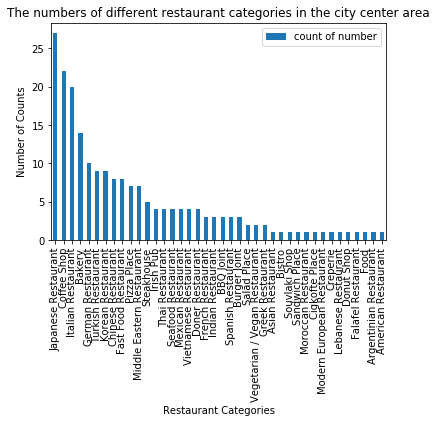

In [25]:
! pip install  matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
count_restaurant.plot(kind='bar')
plt.title('The numbers of different restaurant categories in the city center area')
plt.ylabel('Number of Counts')
plt.xlabel('Restaurant Categories')
plt.show

#### Distribution of Japanese Restaurants

In [26]:
Jan_rest = restaurant_stadtmitte[restaurant_stadtmitte['categories']=='Japanese Restaurant']
Jan_rest.head()

,name,categories,lat,lng
0,Nagomi,Japanese Restaurant,51.221913,6.786502
7,Kagaya,Japanese Restaurant,51.221320,6.788232
10,Takumi,Japanese Restaurant,51.223429,6.788531
11,Waraku,Japanese Restaurant,51.223664,6.787536
13,Hyuga,Japanese Restaurant,51.224525,6.789297


In [27]:
Jan_Des = Jan_rest.describe()
Jan_Des

,lat,lng
count,27.000000,27.000000
mean,51.223857,6.785839
std,0.001837,0.004829
min,51.217971,6.772397
25%,51.223352,6.784968
50%,51.224532,6.788032
75%,51.224914,6.788684
max,51.226073,6.790507


#### Distribution of Italian Restaurants

In [28]:
Ita_rest = restaurant_stadtmitte[restaurant_stadtmitte['categories']=='Italian Restaurant']
Ita_rest.head()

,name,categories,lat,lng
37,Ristorante Da Bruno,Italian Restaurant,51.220325,6.789180
40,Da Noi,Italian Restaurant,51.218662,6.782110
71,Casa Luigi,Italian Restaurant,51.221133,6.773842
87,San Leo,Italian Restaurant,51.224683,6.774443
3,Vini Divini,Italian Restaurant,51.221582,6.774989


#### Distribution of Coffee Shop

In [29]:
coffee = restaurant_stadtmitte[restaurant_stadtmitte['categories']=='Coffee Shop']
coffee.head()

,name,categories,lat,lng
2,Röstzeit,Coffee Shop,51.221855,6.785556
12,Pâtisserie Zurheide,Coffee Shop,51.219062,6.782388
35,Copenhagen Coffee Lab,Coffee Shop,51.221632,6.781740
53,manko café + workspace,Coffee Shop,51.215002,6.786459
60,Copenhagen Coffee Lab,Coffee Shop,51.223151,6.775888


In [30]:
# create map of stadtmitte with latitude and longitude values
map_stadtmitte = folium.Map(location=[area_latitude, area_longitude], zoom_start=15)

# add Japanese restaurants markers to map
for lat, lng, category in zip(Jan_rest['lat'], Jan_rest['lng'], Jan_rest['categories']):
    label = '{}'.format(category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stadtmitte) 

    
# add Italian restaurants markers to map
for lat, lng, category in zip(Ita_rest['lat'], Ita_rest['lng'], Ita_rest['categories']):
    label = '{}'.format(category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stadtmitte) 

# add Coffee shop markers to map
for lat, lng, category in zip(coffee['lat'], coffee['lng'], coffee['categories']):
    label = '{}'.format(category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stadtmitte) 
    
map_stadtmitte

#### get the street name of each Japanese restaurant

In [31]:
address = []
for lat, lng in zip(Jan_rest['lat'].astype(str), Jan_rest['lng'].astype(str)):
    coord = lat + ','+ lng
    location = geolocator.reverse(coord)
    address.append(location)
print (address)

[Location(53, Bismarckstraße, Stadtmitte, Stadtbezirk 1, Düsseldorf, Nordrhein-Westfalen, 40210, Deutschland, (51.22182745, 6.786509402476234, 0.0)), Location(Parkhaus am Hauptbahnhof, 62, Charlottenstraße, Stadtmitte, Stadtbezirk 1, Düsseldorf, Nordrhein-Westfalen, 40210, Deutschland, (51.2217067, 6.788146875735907, 0.0)), Location(41, Immermannstraße, Stadtmitte, Stadtbezirk 1, Düsseldorf, Nordrhein-Westfalen, 40210, Deutschland, (51.222792850000005, 6.7882392561579366, 0.0)), Location(27, Immermannstraße, Stadtmitte, Stadtbezirk 1, Düsseldorf, Nordrhein-Westfalen, 40210, Deutschland, (51.22367105, 6.787451882174513, 0.0)), Location(Hyuga, 78, Klosterstraße, Stadtmitte, Stadtbezirk 1, Düsseldorf, Nordrhein-Westfalen, 40211, Deutschland, (51.2246371, 6.7894001, 0.0)), Location(Schadow-Arkaden, 11, Schadowstraße, Stadtmitte, Stadtbezirk 1, Düsseldorf, Nordrhein-Westfalen, 40212, Deutschland, (51.2253923, 6.781362330285038, 0.0)), Location(55, Oststraße, Stadtmitte, Stadtbezirk 1, Düsse

#### Build up a new data frame for street information

In [32]:
df = pd.DataFrame(data=address, columns = ['street', 'geographical location'])
df

,street,geographical location
0,"53, Bismarckstraße, Stadtmitte, Stadtbezirk 1,...","(51.22182745, 6.786509402476234)"
1,"Parkhaus am Hauptbahnhof, 62, Charlottenstraße...","(51.2217067, 6.788146875735907)"
2,"41, Immermannstraße, Stadtmitte, Stadtbezirk 1...","(51.222792850000005, 6.7882392561579366)"
3,"27, Immermannstraße, Stadtmitte, Stadtbezirk 1...","(51.22367105, 6.787451882174513)"
4,"Hyuga, 78, Klosterstraße, Stadtmitte, Stadtbez...","(51.2246371, 6.7894001)"
5,"Schadow-Arkaden, 11, Schadowstraße, Stadtmitte...","(51.2253923, 6.781362330285038)"
6,"55, Oststraße, Stadtmitte, Stadtbezirk 1, Düss...","(51.225004, 6.788046218817903)"
7,"36, Immermannstraße, Stadtmitte, Stadtbezirk 1...","(51.2233401, 6.789532010515828)"
8,"42, Klosterstraße, Stadtmitte, Stadtbezirk 1, ...","(51.22545985, 6.786106352145881)"
9,"55, Oststraße, Stadtmitte, Stadtbezirk 1, Düss...","(51.225004, 6.788046218817903)"


In [33]:
df_Immermann = df[df['street'].str.contains('Immermannstraße')]
df_Immermann

,street,geographical location
2,"41, Immermannstraße, Stadtmitte, Stadtbezirk 1...","(51.222792850000005, 6.7882392561579366)"
3,"27, Immermannstraße, Stadtmitte, Stadtbezirk 1...","(51.22367105, 6.787451882174513)"
7,"36, Immermannstraße, Stadtmitte, Stadtbezirk 1...","(51.2233401, 6.789532010515828)"
16,"City Toilette, Immermannstraße, Stadtmitte, St...","(51.2240472, 6.7873364)"
18,"28, Immermannstraße, Stadtmitte, Stadtbezirk 1...","(51.223617000000004, 6.788886894403047)"
20,"48, Immermannstraße, Stadtmitte, Stadtbezirk 1...","(51.222706450000004, 6.790682244799429)"
21,"40, Immermannstraße, Stadtmitte, Stadtbezirk 1...","(51.2232584, 6.7899207447270005)"


In [34]:
df_Bismarck = df[df['street'].str.contains('Bismarckstraße')]
df_Bismarck

,street,geographical location
0,"53, Bismarckstraße, Stadtmitte, Stadtbezirk 1,...","(51.22182745, 6.786509402476234)"


In [35]:
df_Charlotten = df[df['street'].str.contains('Charlottenstraße')]
df_Charlotten

,street,geographical location
1,"Parkhaus am Hauptbahnhof, 62, Charlottenstraße...","(51.2217067, 6.788146875735907)"


In [36]:
df_Kloster = df[df['street'].str.contains('Klosterstraß')]
df_Kloster

,street,geographical location
4,"Hyuga, 78, Klosterstraße, Stadtmitte, Stadtbez...","(51.2246371, 6.7894001)"
8,"42, Klosterstraße, Stadtmitte, Stadtbezirk 1, ...","(51.22545985, 6.786106352145881)"
11,"68a, Klosterstraße, Stadtmitte, Stadtbezirk 1,...","(51.22486895, 6.788554736451049)"
12,"68, Klosterstraße, Stadtmitte, Stadtbezirk 1, ...","(51.225023300000004, 6.787901562550712)"
15,"70, Klosterstraße, Stadtmitte, Stadtbezirk 1, ...","(51.224815199999995, 6.7887804539692)"
17,"72, Klosterstraße, Stadtmitte, Stadtbezirk 1, ...","(51.224776399999996, 6.7889740976274)"


In [37]:
df_Schadow = df[df['street'].str.contains('Schadowstraße')]
df_Schadow

,street,geographical location
5,"Schadow-Arkaden, 11, Schadowstraße, Stadtmitte...","(51.2253923, 6.781362330285038)"
23,"Schadow-Arkaden, 11, Schadowstraße, Stadtmitte...","(51.2253923, 6.781362330285038)"


In [201]:
df_Ost = df[df['street'].str.contains('Oststraße')]
df_Ost

,street,geographical location
6,"55, Oststraße, Stadtmitte, Stadtbezirk 1, Düss...","(51.225004, 6.788046218817903)"
9,"55, Oststraße, Stadtmitte, Stadtbezirk 1, Düss...","(51.225004, 6.788046218817903)"
10,"51, Oststraße, Stadtmitte, Stadtbezirk 1, Düss...","(51.22526605, 6.788109193633855)"
26,"37, Oststraße, Stadtmitte, Stadtbezirk 1, Düss...","(51.2259667, 6.788233168085056)"


In [38]:
df_Bahn = df[df['street'].str.contains('Bahnstraße')]
df_Bahn

,street,geographical location
13,"59, Bahnstraße, Stadtmitte, Stadtbezirk 1, Düs...","(51.219594, 6.784633900299308)"


In [39]:
df_Kreuz = df[df['street'].str.contains('Kreuzstraße')]
df_Kreuz

,street,geographical location
14,"19, Kreuzstraße, Stadtmitte, Stadtbezirk 1, Dü...","(51.224176299999996, 6.785592715005791)"


In [40]:
df_Aders = df[df['street'].str.contains('Adersstraße')]
df_Aders

,street,geographical location
19,"44, Adersstraße, Friedrichstadt, Stadtbezirk 3...","(51.2181423, 6.782682708856845)"


In [41]:
df_Kapuzinergasse = df[df['street'].str.contains('Kapuzinergasse')]
df_Kapuzinergasse

,street,geographical location
22,"15, Kapuzinergasse, Altstadt, Stadtbezirk 1, D...","(51.225649700000005, 6.773788102904448)"


In [42]:
df_Stadtbrückchen = df[df['street'].str.contains('Stadtbrückchen')]
df_Stadtbrückchen

,street,geographical location
24,"Musikbrunnen, Stadtbrückchen, Stadtmitte, Stad...","(51.2246878, 6.7763783)"


In [43]:
df_Bergerstraße = df[df['street'].str.contains('Berger Straße')]
df_Bergerstraße

,street,geographical location
25,"12, Berger Straße, Carlstadt, Stadtbezirk 1, D...","(51.22456425, 6.772540953677309)"


In [44]:
data = {'street': ['Immermann street', 'Bismarck street', 'Charlotten street', 
                   'Kloster street', 'Schadow street', 'Ost street', 'Bahn street',
                   'Kreuz street', 'Aders street', 'Kapuzinergasse', 'Stadtbrückchen', 'Berger street'],
        'number of Japanese restaurants': [7, 1, 1, 6, 2, 4, 1, 1, 1, 1, 1, 1]}
Jan_rest_street = pd.DataFrame(data = data)
Jan_rest_street.sort_values(by='number of Japanese restaurants', ascending=False, inplace=True)
Jan_rest_street

,street,number of Japanese restaurants
0,Immermann street,7
3,Kloster street,6
5,Ost street,4
4,Schadow street,2
1,Bismarck street,1
2,Charlotten street,1
6,Bahn street,1
7,Kreuz street,1
8,Aders street,1
9,Kapuzinergasse,1


<function matplotlib.pyplot.show(*args, **kw)>

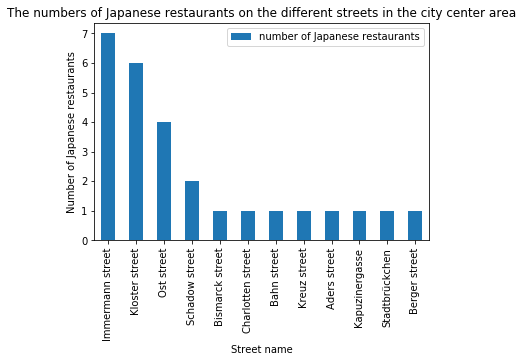

In [45]:
Jan_rest_street.plot(kind='bar', x= 'street', y='number of Japanese restaurants')
plt.title('The numbers of Japanese restaurants on the different streets in the city center area')
plt.ylabel('Number of Japanese restaurants')
plt.xlabel('Street name')
plt.show